### Pandas and Probability
#### Analysis: Movies and Pollution
#### Beverly Pham
#### March 27, 2018

In [1]:
# Render plots inline as output
%matplotlib inline

# Global installs for required packages
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import date
df = pd.read_csv('./movie_metadata.csv')
df = df.drop_duplicates()

import warnings
warnings.filterwarnings('ignore')

### 1. What's the probability that a movie was longer than an hour and a half? Two hours?

In [2]:
(df['duration'][df.duration > 90.0]).count() / df['duration'].dropna().count()

0.8101545253863135

In [3]:
(df['duration'][df.duration > 120.0]).count() / df['duration'].dropna().count()

0.21312462372065022

### 2. What's the probability that a movie was directed by Stephen Spielberg?

In [4]:
(df['director_name'][df.director_name == 'Steven Spielberg']).count() / df['director_name'].dropna().count()

0.005311542390194076

### 3. What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [5]:
clint_count = df[df.director_name == 'Clint Eastwood'].director_name.count()
under = df[df.director_name == 'Clint Eastwood'][df.gross < df.budget].director_name.count()
under / clint_count

0.35

### 4. What's the probability that a movie generally grossed more than its budget?

In [6]:
(df['gross'][df.gross > df.budget]).dropna().count() / df['gross'].dropna().count()

0.492725509214355

### 5. What's the probability that a movie grossed over the average gross of this data set?

In [7]:
avg = df.gross.mean()
df['gross'][df.gross > avg].count() / df['gross'].dropna().count()

0.31910766246362754

### For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross < budget).
### 6. In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [8]:
false_pos = df.query('gross < budget and imdb_score >= 6').imdb_score.count()
false_pos / df['imdb_score'].dropna().count()

0.24289715886354543

In [9]:
df[df.gross < df.budget][df.imdb_score >= 6][['movie_title', 'imdb_score']].head(3)

,movie_title,imdb_score
2,Spectre,6.8
5,John Carter,6.6
7,Tangled,7.8


In [10]:
false_neg = df.query('gross > budget and imdb_score < 6').imdb_score.count()
false_neg / df['imdb_score'].dropna().count()

0.09223689475790316

In [11]:
df[df.gross > df.budget][df.imdb_score < 6][['movie_title', 'imdb_score']].head(3)

,movie_title,imdb_score
37,Transformers: Age of Extinction,5.7
122,Night at the Museum: Battle of the Smithsonian,5.9
174,The Twilight Saga: Breaking Dawn - Part 2,5.5


### 7. If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [12]:
tom_avg = df[df['actor_1_name'] == 'Tom Hanks']['gross'].mean()
tom_avg / df[df['actor_1_name'] == 'Tom Hanks']['budget'].mean()

1.924857945754717

In [13]:
ford_avg = df[df['actor_1_name'] == 'Harrison Ford']['gross'].mean()
ford_avg / df[df['actor_1_name'] == 'Harrison Ford']['budget'].mean()

2.8038465588723622

### 8. Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [14]:
tom_rating = df[df['actor_1_name'] == 'Tom Hanks']['imdb_score'].mean()
tom_rating

7.425000000000001

In [15]:
ford_avg = df[df['actor_1_name'] == 'Harrison Ford']['imdb_score'].mean()
ford_avg

7.15925925925926

### 9. What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [16]:
(df['duration'][df.duration < 90.0][70.0 < df.duration]).count() / df['duration'].dropna().count()

0.13245033112582782

### 10. How does the distribution of movie budgets compare to the movie gross values?

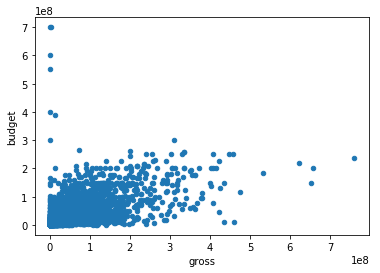

In [17]:
# df[['budget', 'gross']].plot(x='gross', y='budget', kind='scatter')
# decided to filter to remove outliers
df[df.budget < 1000000000.0][['budget', 'gross']].plot(x='gross', y='budget', kind='scatter')

### 11. Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

In [18]:
df.genres.apply(lambda x: x.split('|'))

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
4                                           [Documentary]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
8                             [Action, Adventure, Sci-Fi]
9                   [Adventure, Family, Fantasy, Mystery]
10                            [Action, Adventure, Sci-Fi]
11                            [Action, Adventure, Sci-Fi]
12                                    [Action, Adventure]
13                           [Action, Adventure, Fantasy]
14                           [Action, Adventure, Western]
15                   [Action, Adventure, Fantasy, Sci-Fi]
16                   [Action, Adventure, Family, Fantasy]
17            

### 12. Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

In [19]:
cage = df[df.actor_1_name == 'Nicolas Cage'].imdb_score.mean()
cage

6.2125

In [20]:
imdb_avg = df.imdb_score.mean()
imdb_avg

6.441056422569028

### Nicolas Cage movies and IMDB Scores

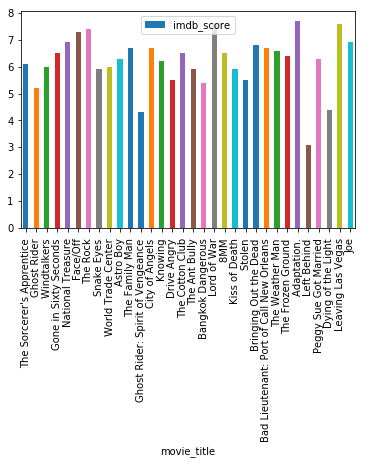

In [21]:
df[df.actor_1_name == 'Nicolas Cage'][['movie_title','imdb_score']].plot(x='movie_title', y='imdb_score', kind='bar')

### 13. Have any years grossed a statistically-significant higher amount than the other years?

In [22]:
gross_year = df[['title_year', 'gross']].groupby('title_year')
gross_year_sum = gross_year['gross'].sum()
gross_year_sum.sort_values(ascending=False).head(5)

title_year
2013.0    1.049929e+10
2012.0    1.041541e+10
2014.0    1.022056e+10
2010.0    9.917119e+09
2009.0    9.901023e+09
Name: gross, dtype: float64

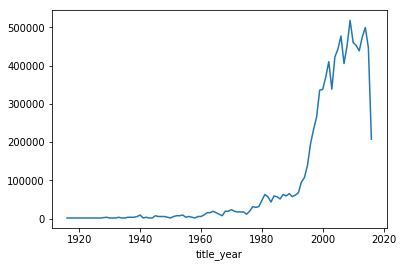

In [23]:
gross_year['title_year'].sum().plot()
# movies really ramped up in the last 30 years!

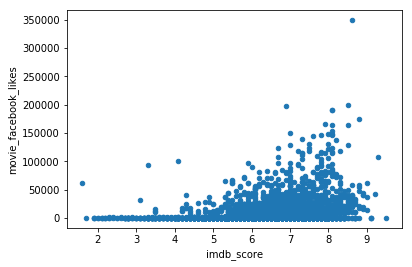

In [24]:
df.plot(x='imdb_score', y='movie_facebook_likes', kind='scatter')

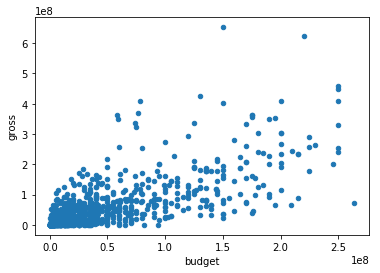

In [25]:
df[df.title_year < 2017][df.title_year > 2010].plot(x='budget', y='gross', kind='scatter')